# Examen Módulo 2 - Montecarlo.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que, sobre todo, se está evaluando su capacidad de interpretar los resultados. Escriba sus **interpretaciones/conclusiones** en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.

---
### Simulación Montecarlo usando Caminata aleatoria<font size='1'>(5.1 puntos)</font>

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A**, **B** y **C**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 3 de cada 5 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 2 de cada 3 operaciones cambia al estado **A**, el resto de casos cambia al estado **B**.
* Estando en el estado **C**, 4 de cada 5 operaciones cambia al estado **A**, el resto de casos cambia al estado **B**.

Respresentado por el siguiente diagrama

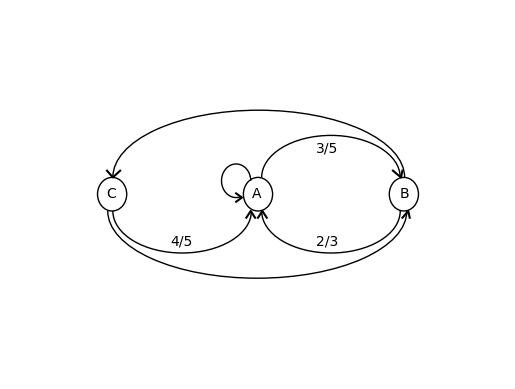

In [ ]:
# @markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

A = patches.Circle((0, 0), 0.1,fc='None',color='k')
B = patches.Circle((1, 0), 0.1,fc='None',color='k')
C = patches.Circle((-1,0), 0.1,fc='None',color='k')
AB = patches.Arc((0.5,   0.1 ), 0.95, 0.5,theta2=180,fc='None',color='k')
BA = patches.Arc((0.5,   -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
BC = patches.Arc((0.005, 0.1), 2.0, 0.8,theta2=180,fc='None',color='k')
CB = patches.Arc((-0.005, -0.1), 2.05, 0.8,theta1=180,fc='None',color='k')
CA = patches.Arc((-0.52, -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
AA = patches.Arc((-0.15, 0.08), 0.2,  0.2,theta2=290,fc='None',color='k')
ax = plt.gca()
ax.add_artist(A)
ax.add_artist(B)
ax.add_artist(C)
ax.add_artist(AB)
ax.add_artist(BA)
ax.add_artist(BC)
ax.add_artist(CB)
ax.add_artist(CA)
ax.add_artist(AA)

plt.plot([0.925,0.98,0.99],[0.14,0.1,0.14],'k')    # AB
plt.plot([0.06,0.03,0],[-0.14,-0.1,-0.14],'k')       # BA
plt.plot([-0.945,-0.995,-1.035],[0.14,0.1,0.14],'k') # BC
plt.plot([-0.02,-0.05,-0.08],[-0.14,-0.1,-0.14],'k') # CA
plt.plot([-0.15,-0.11,-0.15],[0.005,-0.02,-0.045],'k') # AA
plt.plot([0.99,1.03,1.04],[-0.14,-0.1,-0.14],'k') # CB

plt.text(-0.04,-0.02,'A')
plt.text(0.97,-0.02,'B')
plt.text(-1.04,-0.02,'C')
plt.text(0.4,0.25,'3/5')  # AB
plt.text(0.4,-0.3,'2/3') # BA
plt.text(-0.6,-0.3,'4/5') # CA

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Usando caminata aleatoria, defina una función que permita simular el proceso antes descrito. <font size='1'>(2.6 puntos)</font>

In [7]:
import numpy as np

def caminata_estado(estado_inicial, n_operaciones):

    estado = estado_inicial

    for _ in range(n_operaciones):
        r = np.random.rand()

        if estado == "A":
            if r < 3/5:
                estado = "B"
            else:
                estado = "A"

        elif estado == "B":
            if r < 2/3:
                estado = "A"
            else:
                estado = "B"

        elif estado == "C":
            if r < 4/5:
                estado = "A"
            else:
                estado = "B"

    return estado

2. Si el proceso parte del estado **B**, y se ejecutan 300 operaciones. Calcule la probabilidad de que el proceso finalice donde empezó usando el método Montecarlo con 10000 escenarios. <font size='1'>(2.5 puntos)</font>

In [9]:
n_escenarios = 10000
n_operaciones = 300

conteo_B = 0

for _ in range(n_escenarios):
    final = caminata_estado("B", n_operaciones)
    if final == "B":
        conteo_B += 1

probabilidad = conteo_B / n_escenarios

print(f"Probabilidad de finalizar en B: {probabilidad:.4f}")


Probabilidad de finalizar en B: 0.4691


---
### Probabilidad Precio-Umbral <font size='1'>(5.1 puntos)</font>

Suponga que desea invertir en **Tesla** o **Amazon**. Evalúe la probabilidad de obtener un retorno del 15% para Navidad desde el 12 de noviembre del presente año.

1. Obtenga los precios de cierre desde *YAHOO finance* de Tesla y Amazon desde el 11 de noviembre de 2020 al 11 de noviembre de 2025. <font size='1'>(0.8 puntos)</font>

In [10]:
import yfinance as yf
import pandas as pd

inicio = "2020-11-11"
fin = "2025-11-11"

tsla = yf.download("TSLA", start=inicio, end=fin)
amzn = yf.download("AMZN", start=inicio, end=fin)

tsla_close = tsla["Close"]
amzn_close = amzn["Close"]

tsla_close.tail(), amzn_close.tail()

/tmp/ipython-input-282530939.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start=inicio, end=fin)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-282530939.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amzn = yf.download("AMZN", start=inicio, end=fin)
[*********************100%***********************]  1 of 1 completed


(Ticker            TSLA
 Date                  
 2025-11-04  444.260010
 2025-11-05  462.070007
 2025-11-06  445.910004
 2025-11-07  429.519989
 2025-11-10  445.230011,
 Ticker            AMZN
 Date                  
 2025-11-04  249.320007
 2025-11-05  250.199997
 2025-11-06  243.039993
 2025-11-07  244.410004
 2025-11-10  248.399994)

2. Calcule el rendimiento simple para ambas empresas.  <font size='1'>(0.5 puntos)</font>

In [12]:
tsla_r = tsla_close.pct_change().dropna()
amzn_r = amzn_close.pct_change().dropna()

tsla_r.head(), amzn_r.head()

(Ticker          TSLA
 Date                
 2020-11-12 -0.012874
 2020-11-13 -0.007917
 2020-11-16 -0.001004
 2020-11-17  0.082139
 2020-11-18  0.101968,
 Ticker          AMZN
 Date                
 2020-11-12 -0.008641
 2020-11-13  0.005958
 2020-11-16  0.000719
 2020-11-17  0.001469
 2020-11-18 -0.009631)

4. Calcule la media y desviación estandar de los rendimientos y simule 10000 escenarios de rendimientos del 12 de noviembre al 25 de diciembre de 2025.  <font size='1'>(1.6 puntos)</font>

In [14]:
import numpy as np

dias = 43
N = 10000

mu_tsla, sigma_tsla = tsla_r.mean(), tsla_r.std()
mu_amzn, sigma_amzn = amzn_r.mean(), amzn_r.std()

sim_tsla = np.random.normal(mu_tsla, sigma_tsla, size=(N, dias))
sim_amzn = np.random.normal(mu_amzn, sigma_amzn, size=(N, dias))

5. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas.  <font size='1'>(1 punto)</font>

In [16]:
precio_tsla_ini = tsla_close.iloc[-1].item()
precio_amzn_ini = amzn_close.iloc[-1].item()

tsla_precios = precio_tsla_ini * (1 + sim_tsla).prod(axis=1)
amzn_precios = precio_amzn_ini * (1 + sim_amzn).prod(axis=1)

tsla_precios[:5], amzn_precios[:5]

(array([614.07571512, 275.48157063, 557.42425044, 275.12821329,
        591.01922138]),
 array([238.24461544, 321.795476  , 215.73182647, 257.18813555,
        212.77525845]))

6. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 15% a partir de la fecha indicada. ¿Cuál genera mayores espectativas?  <font size='1'>(1.2 puntos)</font>

In [17]:
tsla_retorno = tsla_precios / precio_tsla_ini - 1
amzn_retorno = amzn_precios / precio_amzn_ini - 1

prob_tsla = (tsla_retorno >= 0.15).mean()
prob_amzn = (amzn_retorno >= 0.15).mean()

print("Probabilidad TSLA ≥ 15%:", prob_tsla)
print("Probabilidad AMZN ≥ 15%:", prob_amzn)

Probabilidad TSLA ≥ 15%: 0.3594
Probabilidad AMZN ≥ 15%: 0.1928


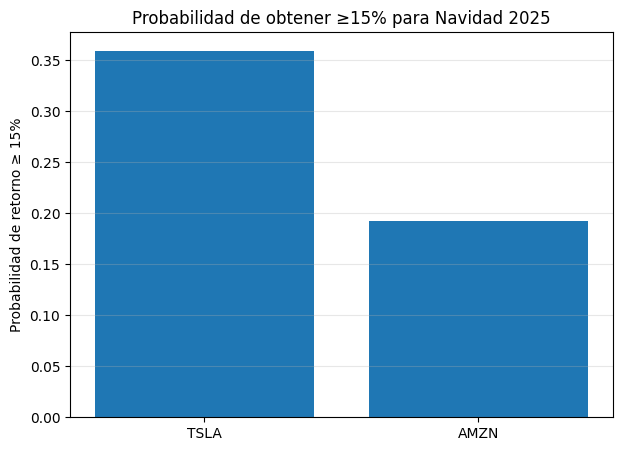

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(["TSLA", "AMZN"], [prob_tsla, prob_amzn])
plt.ylabel("Probabilidad de retorno ≥ 15%")
plt.title("Probabilidad de obtener ≥15% para Navidad 2025")
plt.grid(axis="y", alpha=0.3)
plt.show()
